# **Understanding the Mortality Rate of COVID-19**

Following the CRISP-DM Process (Cross Industry Process for Data Mining), this study will be divided in 5 sections: 1. Business Understanding, 2. Data Understanding, 3. Prepare Data, 4. Data Modeling, 5. Evaluate the Results, and 6. Deploy.

## **1. Business Understanding**

This study aims to find the causes of the different mortality rates of COVID-19, comparing some aspects that can affect its lethality in countries, such as economy, corruption, education, health, and government regime

In this post, we will try to explain some issues:

1. Do richer countries perform better against the virus than emerging countries?
2. Do the most corrupt countries have more deaths?
3. Are countries with the most investments in public health coping better with the pandemic?
4. Does the quality of education interfere with the mortality rate?
5. Is democracy more prepared to save lives than authoritarian regimes?
6. What are the predominant characteristics of countries with the highest and lowest mortality rates?

## **2: Data Understanding**

**Data Source**

1. Coronavirus (COVID-19) Deaths (Our World in Data): https://ourworldindata.org/covid-deaths/
2. Gross domestic product — GDP (The World Bank): https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
3. Corruption Perception Index 2020 (Transparency International): https://www.transparency.org/en/cpi/2020/index/bra
4. Education Index (Human Development Reports): http://hdr.undp.org/en/indicators/103706
5. The 2021 STC Health Index (Hudson's Global Residence Index): https://globalresidenceindex.com/hnwi-index/health-index/
6. Democracy Index 2020 (The Economist Intelligence Unit): https://www.eiu.com/n/campaigns/democracy-index-2020/

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading .csv files**

In [2]:
df = pd.read_csv("covid.csv", encoding = 'utf8', parse_dates=True)
df_gdp = pd.read_csv("gdp.csv", encoding = 'utf8', sep=",")
df_cpi = pd.read_csv("cpi.csv", encoding = 'utf8', sep=";")
df_edu = pd.read_csv("edu.csv", encoding = 'utf8', sep=";")
df_health = pd.read_csv("health.csv", encoding = 'utf8', sep=";")
df_demo = pd.read_csv("demo.csv", encoding = 'utf8', sep=";")

### COVID-19

In [3]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [4]:
np.sum(df.isnull())

iso_code                                      0
continent                                  4750
location                                      0
date                                          0
total_cases                                3757
new_cases                                  3760
new_cases_smoothed                         4770
total_deaths                              13952
new_deaths                                13796
new_deaths_smoothed                        4770
total_cases_per_million                    4277
new_cases_per_million                      4280
new_cases_smoothed_per_million             5285
total_deaths_per_million                  14459
new_deaths_per_million                    14303
new_deaths_smoothed_per_million            5285
reproduction_rate                         19690
icu_patients                              91301
icu_patients_per_million                  91301
hosp_patients                             88822
hosp_patients_per_million               

In [5]:
np.sum(df.isnull()) == 0

iso_code                                  True
continent                                False
location                                  True
date                                      True
total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
reproduction_rate                        False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_ad

In [6]:
df.columns[np.sum(df.isnull()) == 0]

Index(['iso_code', 'location', 'date'], dtype='object')

In [7]:
no_nulls = set(df.columns[np.sum(df.isnull()) == 0])

In [8]:
no_nulls

{'date', 'iso_code', 'location'}

**df**

In [9]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101542,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101543,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101544,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101545,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [10]:
df = df[['location','date','total_deaths_per_million']]

In [11]:
df = df[df['date'] == '2021-07-10'].drop(columns=['date'])

In [12]:
df = df[['location','total_deaths_per_million']]

In [13]:
df

,location,total_deaths_per_million
502,Afghanistan,142.852
1016,Africa,112.767
1518,Albania,853.430
2020,Algeria,87.204
2516,Andorra,1643.694
...,...,...
99489,Vietnam,1.151
100131,World,516.370
100588,Yemen,45.799
101068,Zambia,150.947


**df2020**

In [14]:
df2020 = pd.read_csv("covid.csv", encoding = 'utf8', parse_dates=True)

In [15]:
df2020 = df2020[['location','date','total_deaths_per_million']]

In [16]:
df2020 = df2020[df2020['date'] == '2020-12-31'].drop(columns=['date'])

In [17]:
df2020 = df2020[['location','total_deaths_per_million']]

In [18]:
df2020

,location,total_deaths_per_million
311,Afghanistan,56.283
825,Africa,48.835
1327,Albania,410.383
1829,Algeria,62.849
2325,Andorra,1087.168
...,...,...
99298,Vietnam,0.360
99940,World,241.238
100397,Yemen,20.452
100877,Zambia,21.105


In [19]:
df

,location,total_deaths_per_million
502,Afghanistan,142.852
1016,Africa,112.767
1518,Albania,853.430
2020,Algeria,87.204
2516,Andorra,1643.694
...,...,...
99489,Vietnam,1.151
100131,World,516.370
100588,Yemen,45.799
101068,Zambia,150.947


In [20]:
df_death = df.merge(df2020,how = 'inner',left_on = 'location', right_on = 'location')

In [21]:
df_death['deaths_2021'] = df_death['total_deaths_per_million_x'] - df_death['total_deaths_per_million_y']

In [22]:
df_death = df_death.drop(columns=['total_deaths_per_million_x','total_deaths_per_million_y'])

In [23]:
df_death

,location,deaths_2021
0,Afghanistan,86.569
1,Africa,63.932
2,Albania,443.047
3,Algeria,24.355
4,Andorra,556.526
...,...,...
194,Vietnam,0.791
195,World,275.132
196,Yemen,25.347
197,Zambia,129.842


In [24]:
#Column titles
df.columns

Index(['location', 'total_deaths_per_million'], dtype='object')

In [25]:
#Statistical summary of the DataFrame, with quartiles, median, etc.
df.describe()

,total_deaths_per_million
count,193.000000
mean,699.134228
std,863.602327
min,0.352000
25%,45.799000
50%,320.806000
75%,1173.443000
max,5860.454000


<AxesSubplot:xlabel='total_deaths_per_million', ylabel='Count'>

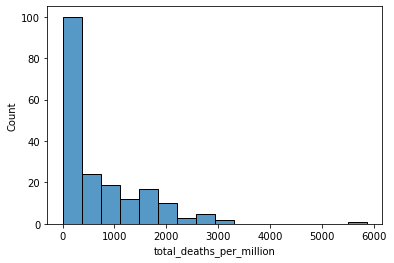

In [26]:
sns.histplot(data=df, x="total_deaths_per_million")

## 3. Prepare Data

### GDP

In [27]:
df_gdp.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.670151e+10,1.748822e+10,1.853584e+10,2.007325e+10,2.186583e+10,2.396287e+10,...,9.131974e+11,9.276555e+11,9.563187e+11,8.930997e+11,8.547519e+11,9.622690e+11,9.840320e+11,9.778092e+11,8.984741e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,1.980707e+10,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040732e+10,1.113130e+10,1.194684e+10,1.268022e+10,1.384262e+10,1.486682e+10,...,7.169352e+11,8.078189e+11,8.469431e+11,7.574921e+11,6.874847e+11,6.809891e+11,7.381313e+11,7.920789e+11,7.865850e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,6.230691e+10,NaN


In [28]:
np.sum(df_gdp.isnull())

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              161
                 ... 
2017               12
2018               12
2019               19
2020               43
Unnamed: 65       266
Length: 66, dtype: int64

In [29]:
df_gdp['Indicator Name'].unique()
df_gdp['Indicator Code'].unique()

array(['NY.GDP.MKTP.CD'], dtype=object)

In [30]:
df_gdp.count()

Country Name      266
Country Code      266
Indicator Name    266
Indicator Code    266
1960              105
                 ... 
2017              254
2018              254
2019              247
2020              223
Unnamed: 65         0
Length: 66, dtype: int64

In [31]:
columns_name = ['Country Name','Country Code','2020']
df_gdp = df_gdp[['Country Name','Country Code','2020']]

In [32]:
df_gdp = df_gdp[~df_gdp['2020'].isna()]

In [33]:
df_gdp = df_gdp.rename(columns={'2020':'GDP'})

In [34]:
df_gdp = df_gdp[['Country Name','GDP']]

In [35]:
df_gdp = df_gdp.sort_values('GDP',ascending=False)

<AxesSubplot:xlabel='GDP', ylabel='Country Name'>

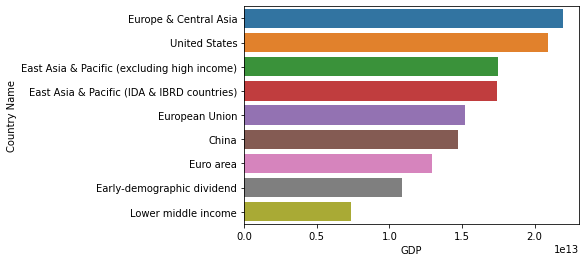

In [36]:
sns.barplot(x = 'GDP', y = 'Country Name', data = df_gdp[11:20])

### Corruption

In [37]:
df_cpi

,Country,ISO3,Region,CPI score 2020,Rank 2020,Sources 2020,Standard error 2020,CPI score 2019,Rank 2019,Sources 2019,...,Standard error 2015,CPI score 2014,Sources 2014,Standard error 2014,CPI Score 2013,Sources 2013,Standard error 2013,CPI Score 2012,Sources 2012,Standard error 2012
0,Denmark,DNK,WE/EU,88,1,8,"1,78",87,1,8,...,"2,16",92.0,7.0,"2,04",91.0,7.0,"2,2",90.0,7.0,2
1,New Zealand,NZL,AP,88,1,8,"1,48",87,1,8,...,"2,32",91.0,7.0,"2,28",91.0,7.0,"2,3",90.0,7.0,"2,2"
2,Finland,FIN,WE/EU,85,3,8,"1,75",86,3,8,...,"1,77",89.0,7.0,"2,05",89.0,7.0,"1,7",90.0,7.0,3
3,Singapore,SGP,AP,85,3,9,"1,2",85,4,9,...,"2,02",84.0,8.0,"1,75",86.0,9.0,"2,3",87.0,9.0,"2,1"
4,Sweden,SWE,WE/EU,85,3,8,"1,3",85,4,8,...,"1,71",87.0,7.0,"3,41",89.0,7.0,"2,3",88.0,7.0,"1,9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,15,176,8,"0,91",16,173,8,...,"2,64",19.0,7.0,"1,69",20.0,7.0,"2,3",19.0,7.0,"2,1"
176,Yemen,YEM,MENA,15,176,7,"1,33",15,177,7,...,"2,66",19.0,6.0,"2,37",18.0,6.0,"2,6",23.0,6.0,"2,2"
177,Syria,SYR,MENA,14,178,5,"1,58",13,178,5,...,"5,66",20.0,4.0,"5,31",17.0,4.0,"3,8",26.0,5.0,"2,7"
178,Somalia,SOM,SSA,12,179,6,"2,29",9,180,5,...,"2,32",8.0,4.0,"2,34",8.0,4.0,"1,9",8.0,4.0,"2,3"


In [38]:
np.sum(df_cpi.isnull())

Country                 0
ISO3                    0
Region                  0
CPI score 2020          0
Rank 2020               0
Sources 2020            0
Standard error 2020     0
CPI score 2019          0
Rank 2019               0
Sources 2019            0
Standard error 2019     0
CPI score 2018          0
Rank 2018               0
Sources 2018            0
Standard error 2018     0
CPI score 2017          0
Rank 2017               0
Sources 2017            0
Standard error 2017     0
CPI score 2016          4
Sources 2016            4
Standard error 2016     4
CPI score 2015         12
Sources 2015           12
Standard error 2015    12
CPI score 2014          6
Sources 2014            6
Standard error 2014     6
CPI Score 2013          4
Sources 2013            4
Standard error 2013     4
CPI Score 2012          5
Sources 2012            5
Standard error 2012     5
dtype: int64

In [39]:
corruption_list = ["Country", "ISO3","CPI score 2020"]
df_cpi = df_cpi[corruption_list]
df_cpi[df_cpi['CPI score 2020'].isna()]

,Country,ISO3,CPI score 2020


In [40]:
corruption_list = ["Country","CPI score 2020"]
df_cpi = df_cpi[corruption_list]

In [41]:
df_cpi.head(5)

,Country,CPI score 2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85


In [42]:
df_asc = df_cpi.sort_values('CPI score 2020')

<AxesSubplot:xlabel='CPI score 2020', ylabel='Country'>

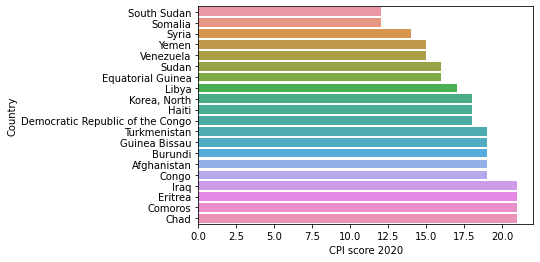

In [43]:
sns.barplot(x = 'CPI score 2020', y = 'Country', data = df_asc[:20])

In [44]:
df_asc = df_cpi.sort_values('CPI score 2020',ascending = False)

<AxesSubplot:xlabel='CPI score 2020', ylabel='Country'>

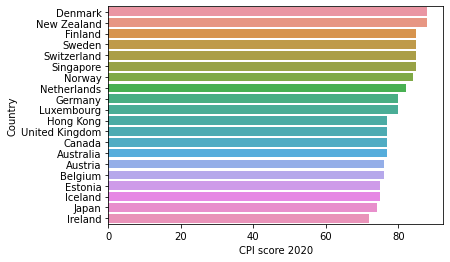

In [45]:
sns.barplot(x = 'CPI score 2020', y = 'Country', data = df_asc[:20])

### Education

In [46]:
df_edu.head()

,HDI Rank,Country,1990,Unnamed: 3,1991,Unnamed: 5,1992,Unnamed: 7,1993,Unnamed: 9,...,2015,Unnamed: 53,2016,Unnamed: 55,2017,Unnamed: 57,2018,Unnamed: 59,2019,Unnamed: 61
0,169.0,Afghanistan,0.122,NaN,0.133,NaN,0.145,NaN,0.156,NaN,...,0.405,NaN,0.406,NaN,0.408,NaN,0.413,NaN,0.414,NaN
1,69.0,Albania,0.583,NaN,0.588,NaN,0.557,NaN,0.542,NaN,...,0.753,NaN,0.745,NaN,0.747,NaN,0.743,NaN,0.746,NaN
2,91.0,Algeria,0.385,NaN,0.395,NaN,0.405,NaN,0.414,NaN,...,0.659,NaN,0.660,NaN,0.665,NaN,0.668,NaN,0.672,NaN
3,36.0,Andorra,..,NaN,..,NaN,..,NaN,..,NaN,...,0.718,NaN,0.722,NaN,0.713,NaN,0.720,NaN,0.720,NaN
4,148.0,Angola,..,NaN,..,NaN,..,NaN,..,NaN,...,0.472,NaN,0.487,NaN,0.498,NaN,0.500,NaN,0.500,NaN


In [47]:
np.sum(df_edu.isnull())

HDI Rank        17
Country          0
1990             2
Unnamed: 3     206
1991             0
              ... 
Unnamed: 57    206
2018             0
Unnamed: 59    206
2019             0
Unnamed: 61    206
Length: 62, dtype: int64

In [48]:
df_edu.shape

(206, 62)

In [49]:
df_edu = df_edu[['Country','2019']]

In [50]:
df_edu

,Country,2019
0,Afghanistan,0.414
1,Albania,0.746
2,Algeria,0.672
3,Andorra,0.720
4,Angola,0.500
...,...,...
201,Sub-Saharan Africa,0.471
202,Least Developed Countries,0.437
203,Small Island Developing States,0.633
204,Organization for Economic Co-operation and Dev...,0.852


### Health

In [51]:
df_health.head(5)

,RANK,COUNTRY,INDEX,Healthy life expectancy at birth (years),Maternal mortality ratio (per 100 000 live births),Proportion of births attended by skilled health personnel (%),Under-five mortality rate (per 1000 live births),"Probability of dying from any of CVD, cancer, diabetes, CRD between age 30 and ext age 70k (%)",Mortality rate attributed to household and ambient air pollution (per 100 000 population),Mortality rate attributed to exposure to unsafe WASH services (per 100 000 population),Mortality rate attributed to unintentional poisoning (per 100 000 population)
0,1,Monaco,1.00,90.00,NaN,NaN,3.5,NaN,NaN,NaN,NaN
1,2,Hong Kong,0.99,84.24,0.0,100.0,1.6,NaN,NaN,NaN,NaN
2,3,Australia,0.94,71.90,6.0,99.0,3.8,8.9,0.4,<0.1,0.5
3,4,Finland,0.93,71.00,3.0,100.0,2.3,10.1,6.0,0.2,0.6
4,4,Iceland,0.93,72.70,3.0,NaN,2.0,8.3,6.4,<0.1,0.7


In [52]:
df_health = df_health[['COUNTRY','INDEX']]

In [53]:
df_health

,COUNTRY,INDEX
0,Monaco,1.00
1,Hong Kong,0.99
2,Australia,0.94
3,Finland,0.93
4,Iceland,0.93
...,...,...
196,South Sudan,0.00
197,Central African Republic,0.00
198,Chad,0.00
199,Somalia,0.00


In [54]:
df_asc = df_health.sort_values('INDEX')

<AxesSubplot:xlabel='INDEX', ylabel='COUNTRY'>

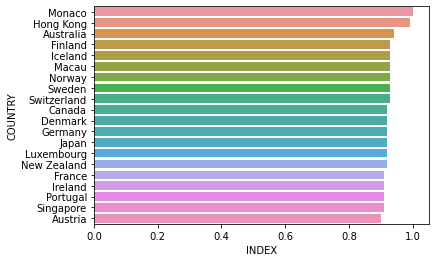

In [55]:
sns.barplot(x = 'INDEX', y = 'COUNTRY', data = df_health[:20])

<AxesSubplot:xlabel='INDEX', ylabel='COUNTRY'>

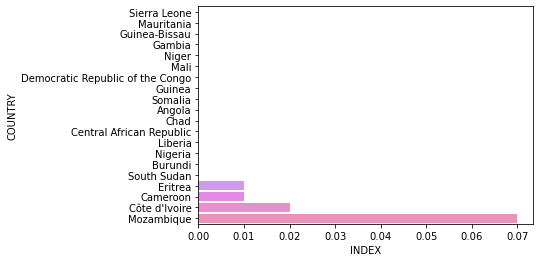

In [56]:
sns.barplot(x = 'INDEX', y = 'COUNTRY', data = df_asc[:20])

### Democracy

In [57]:
df_demo.head(5)

,Country,Overall score,Rank,I Electoral process and pluralism,II Functioning of government,III Political participation,IV Political culture,V Civil liberties,Regime Type
0,Norway,9.81,1,10.00,9.64,10.00,10.00,9.41,Full democracy
1,Iceland,9.37,2,10.00,8.57,8.89,10.00,9.41,Full democracy
2,Sweden,9.26,3,9.58,9.29,8.33,10.00,9.12,Full democracy
3,New Zealand,9.25,4,10.00,8.93,8.89,8.75,9.71,Full democracy
4,Canada,9.24,5,9.58,8.93,8.89,9.38,9.41,Full democracy


In [58]:
df_demo = df_demo[['Country','Overall score','Regime Type']]

In [59]:
df_asc = df_demo.sort_values('Overall score')

In [60]:
df_dsc = df_demo.sort_values('Overall score', ascending=False)

<AxesSubplot:xlabel='Overall score', ylabel='Country'>

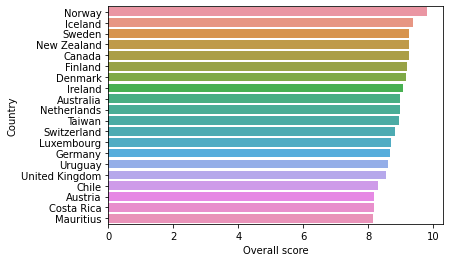

In [61]:
sns.barplot(x = 'Overall score', y = 'Country', data = df_dsc[:20])

<AxesSubplot:xlabel='Overall score', ylabel='Country'>

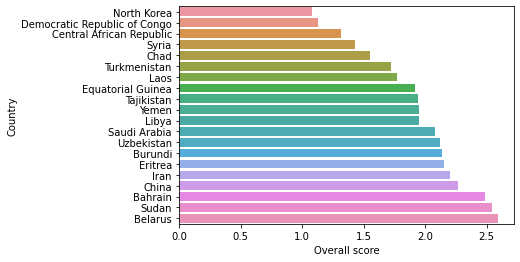

In [62]:
sns.barplot(x = 'Overall score', y = 'Country', data = df_asc[:20])

### Joining Dataframes

In [63]:
df_death.head(5)

,location,deaths_2021
0,Afghanistan,86.569
1,Africa,63.932
2,Albania,443.047
3,Algeria,24.355
4,Andorra,556.526


In [64]:
df_death_total = df.copy()

In [65]:
df = df_death_total.merge(df_death,how = 'inner',left_on = 'location', right_on = 'location')
df['deaths_2020'] = df['total_deaths_per_million'] - df['deaths_2021']
df.head(1)

,location,total_deaths_per_million,deaths_2021,deaths_2020
0,Afghanistan,142.852,86.569,56.283


In [66]:
df = df.merge(df_demo,how = 'inner',left_on = 'location', right_on = 'Country').drop(columns=['Country'])
df.head(1)

,location,total_deaths_per_million,deaths_2021,deaths_2020,Overall score,Regime Type
0,Afghanistan,142.852,86.569,56.283,2.85,Authoritarian


In [67]:
df = df.merge(df_health,how = 'inner',left_on = 'location', right_on = 'COUNTRY').drop(columns=['COUNTRY'])
df = df.rename(columns={'Overall score':'democracy_index','Regime Type':'regime_type',
                   'INDEX':'health_index'})
df.head(1)

,location,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,regime_type,health_index
0,Afghanistan,142.852,86.569,56.283,2.85,Authoritarian,0.08


In [68]:
df_edu = df_edu.rename(columns={'Country':'local'})

In [69]:
df = df.merge(df_edu,how = 'inner',left_on = 'location', right_on = 'local')
df.head(1)

,location,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,regime_type,health_index,local,2019
0,Afghanistan,142.852,86.569,56.283,2.85,Authoritarian,0.08,Afghanistan,0.414


In [70]:
df = df.drop(columns = ['local'])
df = df.rename(columns={'2019':'education_index'})

In [71]:
df = df.merge(df_cpi,how = 'inner',left_on = 'location', right_on = 'Country')

In [72]:
df = df.drop(columns = ['Country'])
df = df.rename(columns={'CPI score 2020':'cpi_index'})

In [73]:
df.head(1)

,location,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,regime_type,health_index,education_index,cpi_index
0,Afghanistan,142.852,86.569,56.283,2.85,Authoritarian,0.08,0.414,19


In [74]:
df = df.merge(df_gdp,how = 'inner',left_on = 'location', right_on = 'Country Name').drop(columns = ['Country Name'])

In [75]:
df = df.rename(columns={'GDP':'gdp'})

In [76]:
np.sum(df.isnull())

location                    0
total_deaths_per_million    0
deaths_2021                 2
deaths_2020                 2
democracy_index             0
regime_type                 0
health_index                0
education_index             0
cpi_index                   0
gdp                         0
dtype: int64

In [77]:
df = df[~df['deaths_2021'].isna()]

In [78]:
df.sort_values('gdp',ascending=False)

,location,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,regime_type,health_index,education_index,cpi_index,gdp
124,United States,1834.221,770.284,1063.937,7.92,Flawed democracy,0.76,0.900,67,2.093660e+13
25,China,3.221,0.001,3.220,2.27,Authoritarian,0.58,0.657,42,1.472273e+13
43,Germany,1088.980,685.669,403.311,8.67,Full democracy,0.92,0.943,80,3.806060e+12
123,United Kingdom,1895.310,810.815,1084.495,8.54,Full democracy,0.89,0.928,77,2.707744e+12
53,India,295.680,187.899,107.781,6.61,Flawed democracy,0.52,0.555,40,2.622984e+12
...,...,...,...,...,...,...,...,...,...,...
18,Burundi,0.673,0.505,0.168,2.14,Authoritarian,0.00,0.417,19,3.258187e+09
66,Liberia,28.472,12.061,16.411,5.32,Hybrid regime,0.00,0.426,28,2.950000e+09
22,Central African Republic,20.291,7.247,13.044,1.32,Authoritarian,0.00,0.353,26,2.303078e+09
65,Lesotho,156.377,132.570,23.807,6.30,Flawed democracy,0.16,0.532,41,1.844510e+09


In [79]:
df['education_index'] = df['education_index'].astype("float")

In [80]:
df.corr()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
total_deaths_per_million,1.000000,0.949680,0.933578,0.435117,0.506127,0.500645,0.287640,0.103134
deaths_2021,0.949680,1.000000,0.774349,0.399511,0.459876,0.439711,0.215852,0.048196
deaths_2020,0.933578,0.774349,1.000000,0.421903,0.496289,0.508285,0.334112,0.153203
democracy_index,0.435117,0.399511,0.421903,1.000000,0.668532,0.712121,0.770556,0.086293
health_index,0.506127,0.459876,0.496289,0.668532,1.000000,0.887075,0.697351,0.122179
education_index,0.500645,0.439711,0.508285,0.712121,0.887075,1.000000,0.763734,0.178520
cpi_index,0.287640,0.215852,0.334112,0.770556,0.697351,0.763734,1.000000,0.177107
gdp,0.103134,0.048196,0.153203,0.086293,0.122179,0.178520,0.177107,1.000000


## 4. Data Modeling

### GDP x Deaths

In [81]:
from scipy.stats import pearsonr

In [82]:
corr, p_value = pearsonr(df['total_deaths_per_million'],df['gdp'])

In [83]:
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')

Independent


In [84]:
from scipy.stats import spearmanr

In [85]:
corr, p_value = spearmanr(df['total_deaths_per_million'],df['gdp'])

In [86]:
corr

0.3892599362579677

In [87]:
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')

Dependent


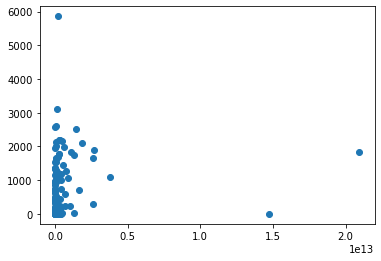

In [88]:
import matplotlib.pyplot as plt
plt.scatter(df['gdp'],df['total_deaths_per_million'])
#plt.xlim((0.0,0.4e13))
#plt.ylim((0.0,3000))

### Histogram

<AxesSubplot:xlabel='total_deaths_per_million', ylabel='Count'>

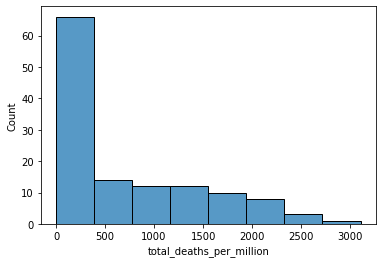

In [89]:
sns.histplot(data=df[df["total_deaths_per_million"] < 4000], x="total_deaths_per_million")

<AxesSubplot:xlabel='gdp', ylabel='Count'>

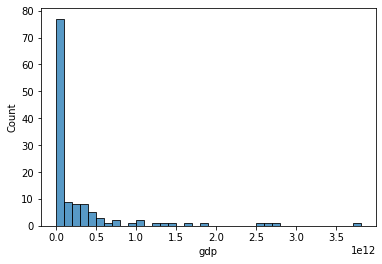

In [90]:
sns.histplot(data=df[df['gdp']<0.4e13], x="gdp")

<AxesSubplot:xlabel='cpi_index', ylabel='Count'>

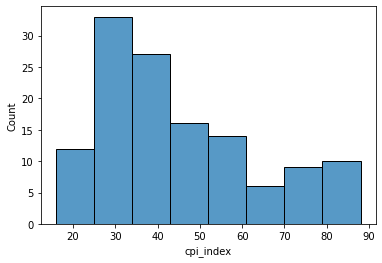

In [91]:
sns.histplot(data=df, x="cpi_index")

<AxesSubplot:xlabel='education_index', ylabel='Count'>

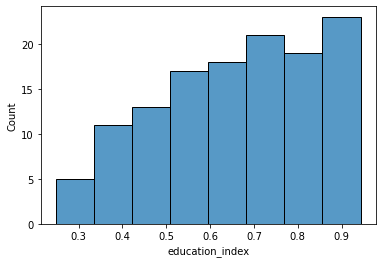

In [92]:
sns.histplot(data=df, x="education_index")

<AxesSubplot:xlabel='health_index', ylabel='Count'>

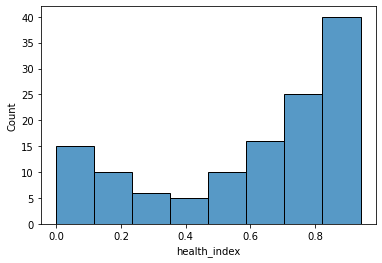

In [93]:
sns.histplot(data=df, x="health_index")

<AxesSubplot:xlabel='democracy_index', ylabel='Count'>

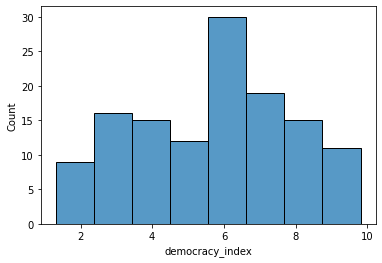

In [94]:
sns.histplot(data=df, x="democracy_index")

### Corruption x Deaths

In [95]:
corr, p_value = spearmanr(df['total_deaths_per_million'],df['cpi_index'])

In [96]:
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')

Dependent


In [97]:
corr

0.44718329600933904

In [98]:
corr, p_value = spearmanr(df['education_index'],df['cpi_index'])

In [99]:
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')

Dependent


In [100]:
corr

0.7914152453415276

In [101]:
corr, p_value = spearmanr(df['health_index'],df['cpi_index'])

In [102]:
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')

Dependent


In [103]:
corr

0.8059163269761505

In [104]:
corr, p_value = spearmanr(df['democracy_index'],df['cpi_index'])

In [105]:
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')

Dependent


In [106]:
corr

0.780479082943608

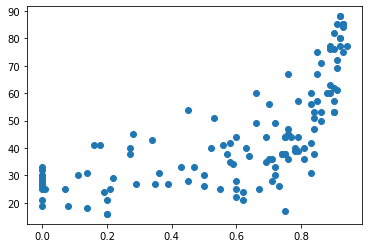

In [107]:
import matplotlib.pyplot as plt
plt.scatter(df['health_index'],df['cpi_index'])

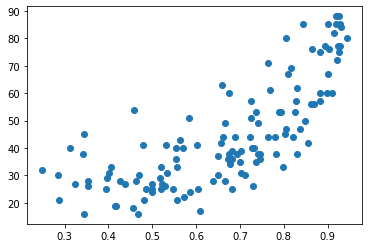

In [108]:
plt.scatter(df['education_index'],df['cpi_index'])

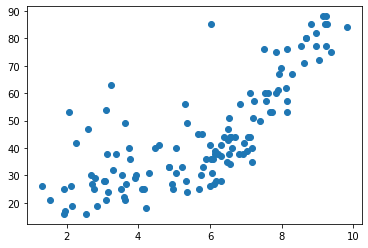

In [109]:
plt.scatter(df['democracy_index'],df['cpi_index'])

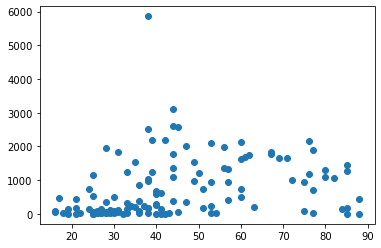

In [110]:
plt.scatter(df['cpi_index'],df['total_deaths_per_million'])

### Health x Deaths

In [111]:
corr, p_value = spearmanr(df[df['regime_type'] == 'Full democracy']['health_index'],df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Independent


-0.3671671792453592

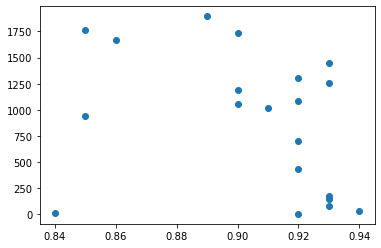

In [112]:
plt.scatter(df[df['regime_type'] == 'Full democracy']['health_index'],df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'])

In [113]:
df['cpi_index'].describe()

count    127.000000
mean      44.464567
std       19.198543
min       16.000000
25%       29.000000
50%       40.000000
75%       56.500000
max       88.000000
Name: cpi_index, dtype: float64

In [114]:
corr, p_value = spearmanr(df[df['cpi_index']<25]['total_deaths_per_million'],df[df['cpi_index']<25]['health_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Dependent


0.7385573999135294

In [115]:
corr, p_value = spearmanr(df['total_deaths_per_million'],df['health_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Dependent


0.5872757313548939

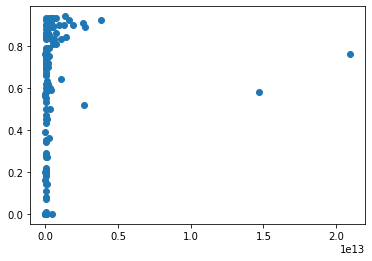

In [116]:
plt.scatter(df['gdp'],df['health_index'])

### Education x Deaths

In [117]:
corr, p_value = spearmanr(df['total_deaths_per_million'],df['education_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Dependent


0.6011204934963441

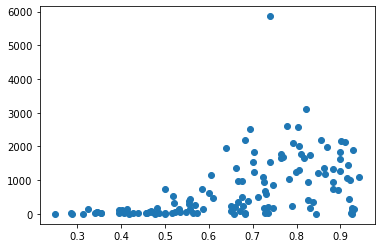

In [118]:
plt.scatter(df['education_index'],df['total_deaths_per_million'])

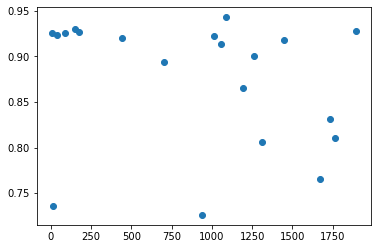

In [119]:
plt.scatter(df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'],df[df['regime_type'] == 'Full democracy']['education_index'])

In [120]:
corr, p_value = spearmanr(df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'],df[df['regime_type'] == 'Full democracy']['education_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Independent


-0.2715306698227892

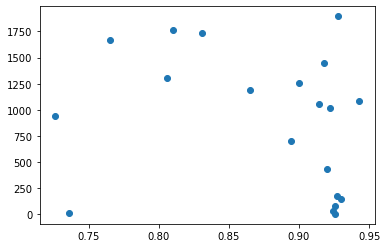

In [121]:
plt.scatter(df[df['regime_type'] == 'Full democracy']['education_index'],df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'])

In [122]:
corr, p_value = spearmanr(df[df['regime_type'] == 'Flawed democracy']['total_deaths_per_million'],df[df['regime_type'] == 'Flawed democracy']['education_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Dependent


0.44879902442158476

### Democracy x Deaths

In [123]:
corr, p_value = spearmanr(df['total_deaths_per_million'],df['democracy_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Dependent


0.5487716461868564

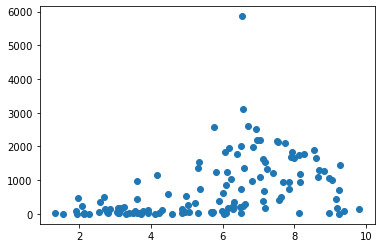

In [124]:
plt.scatter(df['democracy_index'],df['total_deaths_per_million'])

In [125]:
corr, p_value = spearmanr(df[df['regime_type'] == 'Full democracy']['total_deaths_per_million'],df[df['regime_type'] == 'Full democracy']['democracy_index'])
if p_value < 0.05:
    print('Dependent')
else:
    print('Independent')
corr

Dependent


-0.4710309836061585

## 5. Evaluate the Results

In [126]:
df['total_deaths_per_million'].describe()

count     127.000000
mean      740.170677
std       890.740749
min         0.673000
25%        63.933500
50%       358.502000
75%      1246.425500
max      5860.454000
Name: total_deaths_per_million, dtype: float64

In [127]:
top = df[df['total_deaths_per_million']>343.623]
bottom = df[df['total_deaths_per_million']<=343.623]

In [128]:
top.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01
mean,1362.618062,746.953385,615.664677,6.801538,0.786615,0.770154,51.430769,7.216920e+11
std,865.666851,507.922425,462.837314,1.632295,0.107838,0.112576,17.985210,2.646951e+12
min,343.623000,116.900000,17.860000,1.950000,0.530000,0.499000,17.000000,3.807923e+09
25%,743.454000,417.006000,260.475000,6.080000,0.720000,0.694000,38.000000,3.338325e+10
50%,1236.407000,603.741000,471.887000,7.040000,0.790000,0.783000,49.000000,7.760463e+10
75%,1778.593000,938.400000,917.151000,7.900000,0.890000,0.865000,62.000000,4.186218e+11
max,5860.454000,3037.743000,2822.711000,9.260000,0.930000,0.943000,88.000000,2.093660e+13


According to the first question, half of the countries that have an expressive high number of deaths are formed by prosperous nations, but this will become clearer soon with the clustering. Also, there is a very strong relation between the health index and the death rate. Democracy and corruption are also associated with the high death rate.

In [129]:
bottom.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,87.604871,51.912194,35.692677,4.641452,0.401129,0.555790,37.161290,4.111626e+11
std,83.438554,61.108856,42.959138,2.099324,0.318223,0.179604,17.777489,1.890021e+12
min,0.673000,0.000000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09
25%,20.947500,6.526750,7.293000,3.092500,0.140000,0.419250,26.000000,1.275039e+10
50%,56.409500,27.562000,16.801500,4.160000,0.355000,0.526000,31.500000,2.425121e+10
75%,149.917750,63.845250,54.535500,6.037500,0.637500,0.676500,40.750000,1.639700e+11
max,321.312000,257.613000,200.160000,9.810000,0.940000,0.930000,88.000000,1.472273e+13


The more authoritarian countries performed better in terms of the death toll, despite having less education, health, and resources.

In [130]:
top_2021 = df[df['deaths_2021']>192]
bottom_2021 = df[df['deaths_2021']<=192]

In [131]:
top.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01
mean,1362.618062,746.953385,615.664677,6.801538,0.786615,0.770154,51.430769,7.216920e+11
std,865.666851,507.922425,462.837314,1.632295,0.107838,0.112576,17.985210,2.646951e+12
min,343.623000,116.900000,17.860000,1.950000,0.530000,0.499000,17.000000,3.807923e+09
25%,743.454000,417.006000,260.475000,6.080000,0.720000,0.694000,38.000000,3.338325e+10
50%,1236.407000,603.741000,471.887000,7.040000,0.790000,0.783000,49.000000,7.760463e+10
75%,1778.593000,938.400000,917.151000,7.900000,0.890000,0.865000,62.000000,4.186218e+11
max,5860.454000,3037.743000,2822.711000,9.260000,0.930000,0.943000,88.000000,2.093660e+13


In [132]:
bottom.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01
mean,87.604871,51.912194,35.692677,4.641452,0.401129,0.555790,37.161290,4.111626e+11
std,83.438554,61.108856,42.959138,2.099324,0.318223,0.179604,17.777489,1.890021e+12
min,0.673000,0.000000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09
25%,20.947500,6.526750,7.293000,3.092500,0.140000,0.419250,26.000000,1.275039e+10
50%,56.409500,27.562000,16.801500,4.160000,0.355000,0.526000,31.500000,2.425121e+10
75%,149.917750,63.845250,54.535500,6.037500,0.637500,0.676500,40.750000,1.639700e+11
max,321.312000,257.613000,200.160000,9.810000,0.940000,0.930000,88.000000,1.472273e+13


In [133]:
df['deaths_2020'].describe()

count     127.000000
mean      332.528740
std       440.924898
min         0.168000
25%        17.368000
50%       107.781000
75%       475.950500
max      2822.711000
Name: deaths_2020, dtype: float64

In [134]:
top_2020 = df[df['deaths_2020']>107.78]
bottom_2020 = df[df['deaths_2020']<=107.78]

In [135]:
top_2020.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,1336.859750,707.038484,629.821266,6.592656,0.785781,0.771266,50.750000,7.875052e+11
std,893.521682,520.989510,454.914209,1.792010,0.109759,0.116142,18.027316,2.672548e+12
min,190.076000,43.032000,107.781000,1.950000,0.520000,0.499000,17.000000,3.807923e+09
25%,723.785250,371.728500,266.605500,5.877500,0.717500,0.698500,38.000000,4.176430e+10
50%,1230.452000,594.341500,475.950500,6.835000,0.790000,0.796000,47.000000,1.552975e+11
75%,1789.428250,907.811250,920.900000,7.855000,0.890000,0.866000,61.250000,5.209018e+11
max,5860.454000,3037.743000,2822.711000,9.260000,0.930000,0.943000,88.000000,2.093660e+13


In [136]:
bottom_2020.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,134.010349,103.493063,30.517286,4.887937,0.408095,0.558063,38.079365,3.492337e+11
std,245.549667,234.289941,30.003608,2.173320,0.320009,0.177075,18.347279,1.854778e+12
min,0.673000,0.000000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09
25%,21.604000,6.762500,7.483000,3.130000,0.140000,0.421500,26.000000,1.229166e+10
50%,62.943000,29.465000,16.876000,4.580000,0.360000,0.529000,32.000000,1.980707e+10
75%,153.662000,106.879000,50.699000,6.300000,0.680000,0.680000,42.500000,1.032440e+11
max,1671.692000,1619.587000,101.987000,9.810000,0.940000,0.930000,88.000000,1.472273e+13


In [137]:
df_full_democracy = df[df['regime_type']=='Full democracy']

In [138]:
df_full_democracy['deaths_2021'].describe()

count      20.000000
mean      436.566150
std       398.401641
min         0.000000
25%        72.776500
50%       440.250000
75%       600.637750
max      1619.587000
Name: deaths_2021, dtype: float64

In [139]:
top_fd = df_full_democracy[df_full_democracy['deaths_2021']>440.250000]
bottom_fd = df_full_democracy[df_full_democracy['deaths_2021']<=440.250000]

In [140]:
top_fd.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,1405.453500,733.083000,672.370500,8.553000,0.893000,0.851400,72.700000,9.621554e+11
std,346.198506,338.605599,332.703717,0.387443,0.029833,0.075457,8.718435,1.287819e+12
min,936.964000,499.756000,52.105000,8.120000,0.850000,0.726000,57.000000,5.362883e+10
25%,1114.384500,528.388250,434.953500,8.190000,0.867500,0.807000,68.000000,1.181830e+11
50%,1379.132000,615.490500,740.803500,8.575000,0.900000,0.848000,74.000000,4.237936e+11
75%,1717.303250,779.528500,867.624500,8.677500,0.917500,0.921000,79.250000,1.095302e+12
max,1895.310000,1619.587000,1087.311000,9.260000,0.930000,0.943000,85.000000,3.806060e+12


In [141]:
bottom_fd.describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,1.000000e+01
mean,391.350800,140.049300,251.301500,9.09100,0.916000,0.899700,79.400000,5.868057e+11
std,460.204083,158.263096,307.516201,0.43005,0.028752,0.058769,10.362325,5.574579e+11
min,5.392000,0.000000,5.184000,8.14000,0.840000,0.736000,53.000000,1.091407e+10
25%,48.040000,1.728750,46.841250,8.96000,0.920000,0.903500,77.000000,2.271700e+11
50%,161.490000,70.653000,93.116000,9.17500,0.925000,0.922000,83.000000,3.585965e+11
75%,634.024250,264.783500,369.240750,9.24750,0.930000,0.926000,85.000000,8.711739e+11
max,1259.212000,380.744000,883.343000,9.81000,0.940000,0.930000,88.000000,1.643408e+12


**Clustering**

In [142]:
from sklearn.cluster import KMeans

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
scaler = MinMaxScaler()

In [145]:
scaler.fit(df.drop(columns = ['location','regime_type','deaths_2020','total_deaths_per_million']))

MinMaxScaler()

In [146]:
x = scaler.transform(df.drop(columns = ['location','regime_type','deaths_2020','total_deaths_per_million']))

In [147]:
import numpy as np
np.min(x[:,0])

0.0

In [148]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [149]:
km = kmeans.fit(x)

In [150]:
x_cluster = kmeans.transform(x)

In [151]:
km.labels_

array([1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0,
       2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 1, 1,
       2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1])

In [152]:
df['cluster'] = km.labels_

In [153]:
df[df['cluster'] == 0].describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp,cluster
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.0
mean,945.628375,554.371036,391.257339,5.378036,0.694821,0.688946,38.125000,4.905298e+11,0.0
std,1043.240403,604.778808,479.113144,1.643333,0.104394,0.089684,9.702975,1.985287e+12,0.0
min,3.221000,0.001000,0.305000,1.940000,0.470000,0.499000,17.000000,3.807923e+09,0.0
25%,223.709500,134.438750,80.872000,4.062500,0.600000,0.647000,32.500000,2.097738e+10,0.0
50%,567.371000,381.183500,215.088000,6.055000,0.715000,0.685500,38.000000,6.468167e+10,0.0
75%,1366.942750,783.044500,516.997750,6.560000,0.762500,0.741500,44.000000,2.543734e+11,0.0
max,5860.454000,3037.743000,2822.711000,7.620000,0.890000,0.862000,63.000000,1.472273e+13,0.0


In [154]:
df[df['cluster'] == 1].describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp,cluster
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,36.0
mean,62.238111,40.883444,21.354667,3.891667,0.166389,0.432694,29.222222,4.257939e+10,1.0
std,65.550256,53.194508,20.685882,1.364483,0.150298,0.086491,8.485655,8.220852e+10,0.0
min,0.673000,0.505000,0.168000,1.320000,0.000000,0.249000,16.000000,1.219690e+09,1.0
25%,18.853500,7.700000,6.311500,2.992500,0.000000,0.353750,25.000000,9.461024e+09,1.0
50%,39.542000,22.569000,12.683500,3.695000,0.170000,0.447500,28.000000,1.566630e+10,1.0
75%,75.042500,41.800000,26.128750,4.967500,0.272500,0.499250,32.250000,3.458589e+10,1.0
max,321.312000,257.613000,74.629000,6.500000,0.450000,0.587000,54.000000,4.322938e+11,1.0


In [155]:
df[df['cluster'] == 2].describe()

,total_deaths_per_million,deaths_2021,deaths_2020,democracy_index,health_index,education_index,cpi_index,gdp,cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.0
mean,1108.740429,550.112686,558.627743,8.245714,0.888571,0.867457,70.285714,1.239987e+12,2.0
std,692.339482,387.068632,433.448495,0.834130,0.042158,0.060222,11.873281,3.540848e+12,0.0
min,5.392000,0.000000,4.957000,6.030000,0.760000,0.726000,50.000000,1.091407e+10,2.0
25%,568.856500,287.743500,153.319000,7.710000,0.860000,0.826000,60.000000,5.870397e+10,2.0
50%,1190.598000,517.592000,464.163000,8.160000,0.900000,0.883000,72.000000,3.551840e+11,2.0
75%,1676.705500,797.782000,866.457000,8.960000,0.920000,0.919000,80.000000,8.301055e+11,2.0
max,2174.188000,1619.587000,1684.957000,9.810000,0.940000,0.943000,88.000000,2.093660e+13,2.0
